<a href="https://colab.research.google.com/github/roulupen/EVAAssignments/blob/master/Assignment4/Assignment4_3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### On this model, on top of basic model I'm changing following things


1.   Adding droput at different layers
2.   Increasing number of epoch to 40
3. Batch normalization


### Importing Keras library 

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Importing other required library

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Displaying the first image from the dataset

(60000, 28, 28)


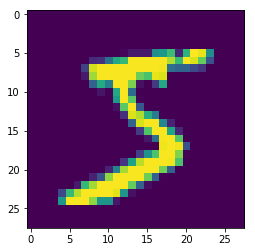

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Reshaping the train test dataset by defining number of channel for the input image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the train and test data set by dividing 255, as 255 is the maximum value for a channel in an image and minimum is 0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### displaying last 10 values from the output of train dataset

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### As this is a classification problem with 10 labels(0-9 numbers), so here we are converting the labels into hot encoding to use in the model prediction

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Displying the last 10 values from the output of train dataset after hot encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 1st Model
## Less than 15k paramter and target validation accuracy > 99.4%

### Model defination
#### This is a very simple model, along with convultion layer I have added 
1. 1x1 convolution and Maxpooling
2. Added dropout
3. Increased number of epochs during model training 
4. Added batch normalization

In [31]:
from keras.layers import Activation, MaxPooling2D, Dropout, BatchNormalization
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x10
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 26x26x10 -> (3x3x10) x 20 -> 24x24x20
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 26x26x20 -> (3x3x20) x 30 -> 22x22x30
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x30
model.add(Convolution2D(10, 1, activation='relu')) # 11x11x30 -> (1x1x32) x10 -> 11 x 11 x 10
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 11x11x10 => (3x3x10) x 16 => 9x9x16
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 9x9x32 => (3x3x16) x 32 => 7x7x32
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu')) # 7x7x32 => (1x1x32) x 10 => 7x7x10
model.add(BatchNormalization())

model.add(Convolution2D(10, 7)) # 7x7x10 => (7x7x10) => 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_31 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 22, 22, 32)        0         
__________

#### Displaying model summary 

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_31 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 22, 22, 32)        0         
__________

#### Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Train the model

In [34]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpointer = ModelCheckpoint(filepath='assignment4_model_4.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')

model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpointer])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 13s 214us/step - loss: 0.2137 - acc: 0.9337 - val_loss: 0.0544 - val_acc: 0.9812

Epoch 00001: val_acc improved from -inf to 0.98120, saving model to assignment4_model_4.h5
Epoch 2/40
60000/60000 [==============================] - 11s 180us/step - loss: 0.0591 - acc: 0.9821 - val_loss: 0.0469 - val_acc: 0.9847

Epoch 00002: val_acc improved from 0.98120 to 0.98470, saving model to assignment4_model_4.h5
Epoch 3/40
60000/60000 [==============================] - 11s 180us/step - loss: 0.0478 - acc: 0.9850 - val_loss: 0.0390 - val_acc: 0.9875

Epoch 00003: val_acc improved from 0.98470 to 0.98750, saving model to assignment4_model_4.h5
Epoch 4/40
60000/60000 [==============================] - 11s 182us/step - loss: 0.0407 - acc: 0.9872 - val_loss: 0.0353 - val_acc: 0.9887

Epoch 00004: val_acc improved from 0.98750 to 0.98870, saving model to assignment4_model_4.h5
Epoch 5/40
60000/

In [0]:
# Load the weights with the best validation accuracy:
model.load_weights('assignment4_model_4.h5')

#### Validate the model accuracy with test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

#### Printing the validation accuracy

In [38]:
print(score)

[0.02501562987520774, 0.9932]


### Predicting the test data outout using the model

In [0]:
y_pred = model.predict(X_test)

### Printing last 10 predicted(probability like) vs actual output 

In [40]:
print(y_pred[:9])
print(y_test[:9])

[[2.0825658e-10 7.8186874e-10 5.6261007e-07 2.0459444e-08 4.2417533e-14
  1.3152100e-10 5.8969957e-17 9.9999940e-01 8.2971567e-11 2.5059117e-08]
 [7.5763851e-06 6.0660577e-06 9.9998522e-01 1.0374975e-09 5.0918113e-13
  1.8361156e-13 1.1828064e-06 1.3660979e-12 6.0285732e-09 7.6060503e-12]
 [5.8815598e-08 9.9999845e-01 1.5293384e-08 3.5230210e-09 6.3187002e-08
  1.1998726e-07 1.0768575e-06 2.4961005e-07 4.4878565e-08 1.0855415e-08]
 [9.9999404e-01 3.7125298e-12 2.2848427e-08 8.4381840e-10 7.2643253e-10
  2.0984591e-07 5.5124697e-06 5.9925914e-10 1.9980354e-07 9.4052282e-08]
 [1.9325213e-13 9.7825026e-11 3.0416083e-11 4.8366953e-13 9.9998617e-01
  9.2986426e-13 2.8810015e-10 4.1110253e-12 2.0542998e-09 1.3820504e-05]
 [2.3570345e-07 9.9999750e-01 3.1134144e-07 2.9906463e-10 6.6394890e-08
  9.8927853e-09 5.2252869e-07 9.0267986e-07 2.7222083e-07 2.9185976e-08]
 [2.8212726e-18 1.9343702e-09 4.7412274e-10 3.3001238e-12 9.9999630e-01
  1.3945553e-10 4.1107829e-13 6.0122915e-08 3.8738335e-07 